In [1]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *

In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
LK = np.array(pd.read_csv ('../data/processed_data/LK.csv'))
y = np.array(LK[:,-1],dtype=int)
LK = LK[:,0:-1]

In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(LK,y)

In [5]:
print(LK.shape, len(pred))
acc = model.score_
print(acc)

(793, 3014) 793
0.5387931034482759


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6811989100817438, 0.998620680764942, 0.5387931034482759, 0.9992454144416066, 0.46120689655172414, 0.3188010899182561)


# Mutual information maximizer (MIM)

[   9   26   30   31   32   52   62   71   77  135  189  219  231  234
  275  286  319  324  329  351  361  363  396  417  455  465  471  472
  473  474  528  540  579  607  640  699  710  830  845  863  866  876
  896  909  917  933  954  960  988 1011 1041 1073 1079 1085 1088 1089
 1111 1135 1149 1159 1182 1188 1193 1228 1243 1297 1312 1314 1315 1322
 1355 1364 1418 1419 1460 1518 1527 1534 1548 1549 1556 1562 1632 1634
 1649 1687 1690 1706 1773 1800 1815 1833 1838 1842 1865 1867 1887 1908
 1935 1962 1968 1987 1992 1993 1995 2003 2037 2049 2054 2080 2103 2153
 2250 2272 2314 2417 2428 2436 2482 2483 2522 2553 2560 2616 2652 2655
 2670 2676 2716 2779 2831 2858 2871 2879 2906 2923 2934 2939 3000 3006] 0.7655913978494624


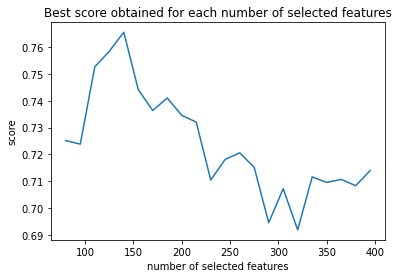

In [7]:
N = np.arange(80,401,15)
#N = np.arange(210,241,5)
best_subset, best_score = MIM(y, LK, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [8]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(LK[:, best_subset],y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

140
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9198966408268734, 0.9991626527774576, 0.7655913978494624, 0.9997617125946424, 0.23440860215053763, 0.08010335917312661)


# Anova F test

In [ ]:
N = np.arange(80,401,15)
#N = np.arange(210,241,5)
best_subset, best_score = Anova(y, LK, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(LK[:, best_subset],y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Stimulated annealing

In [ ]:
best_subset, best_score  = stimulated_annealing(y, LK, FamiliesClusters, compute_sensitivity,True, 1400, 0.1, 1, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(LK[:, best_subset],y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Genetic feature selection algorithm

In [ ]:
best_subset, best_score  = genetic_fs(y,LK,FamiliesClusters,compute_sensitivity,True, 500, 0.5, 0.2, 50, 3, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(LK[:, best_subset],y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Hybrid methods

# Mutual information and stimulated annealing

In [ ]:
best_subset, best_score = MI_stimulated_annealing(y,LK, FamiliesClusters, compute_sensitivity,True, np.array([400]), 3, 5000, 0.05, 1, True)
print(best_subset, best_score)

In [15]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(LK[:, best_subset],y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

207
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9548387096774194, 0.9964129684985054, 0.6548672566371682, 0.9996770323890376, 0.34513274336283184, 0.04516129032258064)


# Mutual information and genetic feature selection

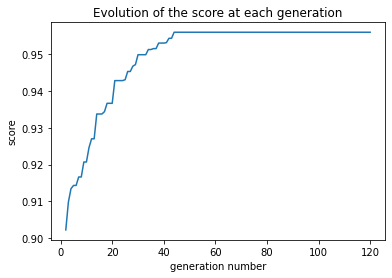

[   2    3    7    9   26   30   31   32   36   40   46   47   53   59
   63   77   78   84   85   97  117  128  130  131  135  139  140  142
  151  166  177  181  185  193  195  204  209  217  226  227  229  233
  237  245  253  263  274  283  285  323  329  330  342  350  353  359
  365  370  376  379  395  400  404  412  417  420  424  425  426  432
  451  456  460  469  471  474  475  476  478  484  492  493  513  522
  526  532  539  545  546  547  591  596  600  601  604  606  612  616
  619  622  624  646  647  649  653  657  665  670  691  693  705  707
  718  719  721  735  737  740  744  746  747  754  758  771  782  788
  791  797  814  815  819  822  826  827  832  833  834  841  849  852
  853  859  875  877  880  891  893  898  908  911  921  922  924  933
  935  940  950  951  952  959  967  970  976  978  985  993  996 1005
 1014 1027 1030 1031 1047 1049 1053 1054 1057 1064 1071 1074 1075 1086
 1087 1096 1097 1098 1106 1107 1109 1110 1115 1117 1121 1129 1130 1133
 1138 

In [16]:
best_subset, best_score = MI_genetic_fs(y,LK, FamiliesClusters, compute_sensitivity,True, np.array([700]), 3,  300, 0.5, 0.2, 120, 3, True)
print(best_subset, best_score)

In [17]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(LK[:, best_subset],y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

559
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9573170731707317, 0.997424592954734, 0.7268518518518519, 0.9996937480859255, 0.27314814814814814, 0.042682926829268296)


In [ ]:
LK_best = get_best_genes_names(LK_best_subset, '../data/processed_data/LKgenes_interest.csv' ,'../data/optimized_subsets/LKgenes_best.csv')